#Lecture 4: Normal distribution and other continuous distributions
Irene Brox Nilsen, 4. September 2015

##Outline
* Continuous probability distributions: the basics
    * Moments
* Normal distribution
    * Standard normal distribution
    * 68-95-99 rule
    * Reproducible properties
    * Constructing pdfs to data
    * Central limit theorem
* Normal approximations to other distributions
    * Binomial distribution
    * Poisson distribution
* Lognormal distribution
* Chi square distribution
* Student t distribution
* F distribution
* Extreme value distributions


In [1]:
## Import packages needed to do calculations and plotting
# required to keep the plots in the notebook, not in an external window
%matplotlib inline
import numpy as np
import pandas as pd
import math
from scipy import stats                 # required to use norm.pdf, norm.cdf
import matplotlib.pyplot as plt         # required to plot

# Continuous probability distributions: the basics
###### From discrete to continuous distributions
You've talked about discrete probability distributions. Some variables may be measured infinitely detailed. In that case, you may reduce the bin width and get more and more bins. This shape approximates a curve. Some of the curves are given by mathematical functions, which we'll talk about today.

###### Properties of probability distributions
* The area under the curve = 1
* $P(a \leq X \leq b)$ is the area under the curve from $a$ to $b$
* The curve is never negative, that is $f(x) \geq 0$

The first point, can also be stated as "the integral of the probability density function equals one", or 

$F(x) = \int_{-\infty}^{\infty} f(x) dx = 1$. 

Use this to solve question 3a in exercise 1.

###### How do we characterize large datasets? Let's look at a dataset from all possible angles.

###### Measures of central tendency
* Mean (also called average, or expected value)
* Median
* Mode

How should we define these measures mathematically to solve question 3d, 3e and 3f in exercise 1?

###### Measures of spread
* Variance
* Standard deviation
* Coefficient of variation

###### Measure of skewness
* Skewness

Learning goal 1: understand what these measures are and where they are marked off the curve. <br/>
Learning goal 2: understand what happens if the mean, standard deviation or skewness is changed. http://www.ipcc.ch/report/graphics/index.php?t=Assessment%20Reports&r=AR5%20-%20WG1&f=Chapter%2001

In [2]:
# Assume a normal distribution (heights) as an example of a continuous distribution. Where would these numbers be marked off the curve?
# Then find the numbers for the daily Uppsala precipitation (in EX1 - it is done for monthly data), and try to sketch the distribution.

precip_daily=pd.read_table("P_Uppsala.dat",header=None,names=['year','month','day','prec'])
## P_daily = precip_daily.as_matrix()
## type(P_daily)

# Measures of central tendency
print('Mean = '  , precip_daily['prec'].mean())    # The balance point of the dataset. Influenced by outliers. 
print('Median = ', precip_daily['prec'].median())  # The middle value of the dataset, _sorted_ from smallest to largest. 50%.
print('Mode = '  , precip_daily['prec'].mode())    # The most common values in the dataset.

# Measures of spread
print('Variance = ', precip_daily['prec'].var())     # Variance is the average squared deviation in the dataset.
print('Stdev = '   , precip_daily['prec'].std())     # Standard deviation is the square root of the variance. The units of std and mean are the same.
print('Cv = '      , precip_daily['prec'].std()/precip_daily['prec'].mean())  # The coefficient of variation is std relative to the mean.  

# Measure of skewness
print('Skewness = ', precip_daily['prec'].skew())    # Skewness is the degree of asymmetry in the distribution.

# Let's sketch the distribution of daily precipitation according to these numbers. (on the blackboard)

# Daily observations of rainfall are known to have heavy tails, because it is possible to get a rainfall value that is 
# very much larger than the median/mode, but values that are much less than the median/mode do not occur. (The median
# and mode of a rainfall station is 0 if more than half of the days do not experience rain. 1. sept 2015, an extreme
# event resulted in 118 mm rainfall recorded in 24 hours in Postmyr and 104 mm in Lier.) 


('Mean = ', 2.063778939507092)
('Median = ', 0.0)
('Mode = ', 0    0
dtype: float64)
('Variance = ', 25.120308724028334)
('Stdev = ', 5.012016432936781)
('Cv = ', 2.428562641565593)
('Skewness = ', 8.1540160095152778)


In [3]:
# MATRIX FORM, instead of dataframe. Consider converting into matrix if time.
# Measures of central tendency
print(P_daily[:,3].mean())    # The balance point of the dataset. Influenced by outliers. 
print(P_daily[:,3].median())  # The middle value of the dataset, _sorted_ from smallest to largest. 50%.
print(P_daily[:,3].mode())    # The most common values in the dataset.

# Measures of spread
print(P_daily[:,3].var())     # Variance is the average squared deviation in the dataset.
print(P_daily[:,3].std())     # Standard deviation is the square root of the variance. The units of std and mean are the same.
print(P_daily[:,3].std()/precip_daily[:,4].mean())  # The coefficient of variation is std relative to the mean.  

# Measure of skewness
print(precip_daily[:,3].skew())    # Skewness is the degree of asymmetry in the distribution.


NameError: name 'P_daily' is not defined

# The normal distribution
###### How do we know whether a dataset follows the normal distribution, and if it is skewed, how can we find out what distribution it follows? Let's try the normal distribution and see if it fits our daily precipitation. First, some basics about the normal distribution.

In [4]:
# I didn't find any real normally distributed data, so I'm generating a vector of 
# 500 normally distributed data having mean = 16 and standard deviation = 3 (which is not unrealistic summer temperatures in Oslo).
generated_data = np.random.normal(loc=16, scale=3, size=500)

In [5]:
# Plot a histogram of generated data.
# plt.hist(generated_data, bins = 12, normed = False)
# plt.show()

What have we plotted above? Describe the shape. <br/ >
What names would you give to the axes?

In [6]:
## Example for the students to try at home:
# Change the mean to 18
generated_data_changed_mean = np.random.normal(loc=18, scale=3, size=500)
# plt.hist(generated_data,              bins = 12, normed = False)               # plot the original dataset again
# plt.hist(generated_data_changed_mean, bins = 12, normed = False, alpha = 0.7)  # then plot the data with changed mean, transparent
# plt.show()      # What is the effect of changing the mean? It is easier to see when a larger dataset is generated.

In [7]:
## Example for the students to try at home, continued:
# Change the standard deviation to 5 
generated_data_changed_std = np.random.normal(loc=16, scale=5, size=500)
# plt.hist(generated_data,             bins = 12, normed = False)                # plot the original dataset again
# plt.hist(generated_data_changed_std, bins = 12, normed = False, alpha = 0.7)   # then plot the data with changed standard deviation
# plt.show()    # What is the effect of increasing the standard deviation?

In [8]:
# Before we plot normal distribution curve, let's generate a larger dataset
generated_data = np.random.normal(loc=16, scale=3, size=10000)    # generate a larger sample of normally distributed data
# plt.hist(generated_data,             bins = 50, normed = True)    # plot the generated data. 'normed' must equal True.
# plt.show()

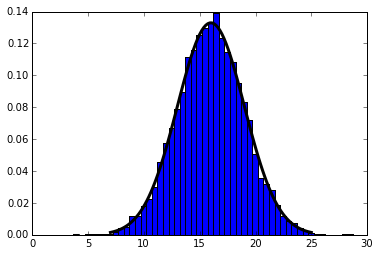

In [9]:
# Plot the normal distribution curve. 
# To do this, we need to import matplotlib.mlab as mlab and use the function normpdf
my_mean = 16
my_std = 3

generated_data = np.random.normal(loc=my_mean, scale=my_std, size=10000)# generate a larger sample of normally distributed data
plt.hist(generated_data,             bins = 50, normed = True)          # plot the generated data. 'normed' must equal True.
x = np.linspace(my_mean-3*my_std,my_mean+3*my_std,100)                  # define the x values that we want in our plot
plt.plot(x,stats.norm.pdf(x,my_mean,my_std), color="black", linewidth=3)# plot the normal distribution curve
plt.show()
# Does the curve fit the data?

The normal distribution curve is given as <br/ >
$f(x) = \frac{1}{\sigma \sqrt{2 \pi}}\exp(\frac{-(x-\mu)^2}{2 \sigma^2})$ <br/ >
Which parameters does it require? How do they change the curve? <br/ >

$f(x)$ is called the probabiliby density function, or PDF.  <br/ >
How do we read off any percentiles from this curve, for instance the 90th percentile? <br/ >
The answer is: we can't. The 90th percentile is the x value up to which the area under the curve is 0.9.  <br/ >

We may plot the distribution in a different way to make it easier to read off percentiles: <br/ >
The cumulative distribution function, or CDF.
(The normal cdf is not given as a formula because the integral of $f(x)$ is not analytically solvable.)

Learning goal 3: understand the difference between the pdf and the cdf.

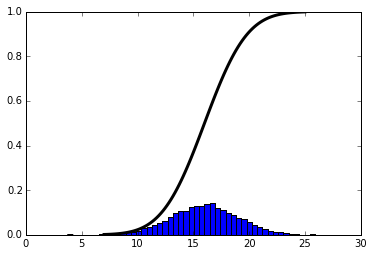

In [10]:
# To match the data with the curve, we first need to find the cumulative values of our histogram.
generated_data = np.random.normal(loc=my_mean, scale=my_std, size=10000)# generate a larger sample of normally distributed data
plt.hist(generated_data,             bins = 50, normed = True, cumulative=False)          # plot the generated data. 'normed' must equal True.
x = np.linspace(my_mean-3*my_std,my_mean+3*my_std,100)                  # define the x values that we want in our plot
plt.plot(x,stats.norm.cdf(x,my_mean,my_std), color="black", linewidth=3)# plot the normal distribution curve
plt.show()
# Does the curve fit the data? Try changing cumulative=False into cumulative=True in line "plt.hist...".

136.6


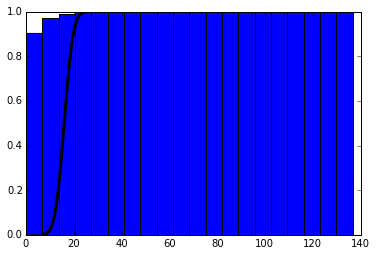

In [12]:
# Next, let's fit the normal distribution to our daily precipitation data - first the probability density function.
P_daily = precip_daily.as_matrix()
#plt.hist(P_daily[:,3],   bins = 20, normed = True)                      # plot the daily precipitaion data
print(P_daily[:,3].max())                                               # What's the largest number we plot?

x = np.linspace(my_mean-3*my_std,my_mean+3*my_std,100)                  # define the x values that we want in our plot
#plt.plot(x,stats.norm.pdf(x,my_mean,my_std), color="black", linewidth=3)# plot the normal distribution curve
#plt.show()
# Does the curve fit the data?

# Second, we fit the cumulative distribution function to the data:

plt.hist(P_daily[:,3],   bins = 20, normed = True, cumulative=True)     # Add cumulative=True               
x = np.linspace(my_mean-3*my_std,my_mean+3*my_std,100)                  # define the x values that we want in our plot
#plt.plot(x,stats.norm.cdf(x,my_mean,my_std), color="black", linewidth=3)# changes stats.norm.pdf into stats.norm.cdf
#plt.show()
# Does the curve fit the data? Can we conclude that the daily precipitation is normally distributed?

## Standard normal distribution

Because $f(x)$ is not analytically integrable, we use a table of probabilities to find the integral up to a value x. This table is developed for the case when the normal distribution has $\mu=0$ and $\sigma=1$, that is <br/ >
$f(z) = \frac{1}{\sqrt{2 \pi}}\exp(\frac{-z^2}{2})$ <br/ >

This is called the standard normal distribution, and we replace x with z whenever we use it.

If you're data is normally distributed with different $\mu$ and $\sigma$, transform it into the standard normal by subtracting $\mu$ from all data, and dividing by $\sigma$. Then look up in the table: https://en.wikipedia.org/wiki/Standard_normal_table#Cumulative
Last, transform you data back to what they were.

#### Example 4.3 in the compendium
######What is the probability for any given year the annual maximum discharge is less than 8 m$^3$/s <br/ > for annual maximum  discharge having mean = 10m$^3$/s and standard deviation = 3 m$^3$/s?

First, standardize: <br/ >
$\frac{8-\mu}{\sigma}$ <br/ >
insert values
$\frac{8-10}{3}$ = -2/3 = -0.67 <br/ >
The Z value corresponding to 8 m$^3$/s is -0.67.

When we look up in the table, we see that Z = -0.67 corresponds to a probability of 0.251.
Thus, the probability that the annual maximum discharge is less than 8 m$^3$/s is 25 %.

Let's expand this example and make a table of different discharge values and their corresponding Z values and probabilities:
######What is the probability that the discharge is less than 1, 4, 7, 10, 13, 16 and 19 m$^3$/s?

|x   | calculation|   = Z  | p(z) |
|------|----------|--------|------|
|x<1   | (1-1)/3  | = -3   |  0.1 |
|x<4   | (1-4)/3  | = -2   |  2.3 |
|x<7   | (1-7)/3  | = .... |  ... |
|x<10  | (1-10)/3 | = .... |  ... |
|x<13  | (1-13)/3 | = .... |  ... |
|x<16  | (1-16)/3 | = .... |  ... |
|x<19  | (1-19)/3 | = .... |  ... |

What is the probability that the discharge is between 7 and 13 m$^3/s$, 4 and 16 m$^3/s$, 1 and 19 m$^3/s$?

$P(7 < x < 13) = $ ?<br/ >
$P(4 < x < 16) = $ ?<br/ >
$P(1 < x < 19) = $ ?<br/ >

Learning goal 4: be able to calculate probabilities for normally distributed variables.

## The 68-95-99 rule, or the empirical rule
For normal distributions, <br/ >
68 % of the observations fall within 1 standard deviation around the mean <br/ >
95 % of the observations fall within 2 standard deviations around the mean <br/ >
99 % of the observations fall within 3 standard deviations around the mean (almost all observations fall within 3 $\sigma$).

This property can be used to justify the use of the normal distribution even if the hydrological variable is bounded by x = 0. See example 4.1 in the compendium. $\mu$ = 600, $\sigma$ = 100.

Z = $\frac{0 - 600}{100} = -6$

What does this result tell us?

## Central limit theorem 
Are the statistical properties of daily and monthly observations the same? What about annual observations? 

Monthly averages (normalized sum) of daily data - is found by taking the average of approx. 30 daily data. There are 365 daily data in an annual average. What happens to the variability when we take the average of many observations?

$\bar{X} = \frac{1}{n}(X_1 + X_2 + ... + X_n)$  is approximately ~N($\mu$, $\frac{\sigma}{\sqrt(n)}$) <br/ >

The central limit theorem says that the average of a variable is normally distributed when $n$ gets large. This has the practical implication that if you can divide a variable into independent subsets that are equally big (think: measuring the precipitation once a day), the total (annual rainfall) is approximately normally distributed. This is why the normal distribution shows up so many places.

"[T]he central limit theorem allows us to use normal probability calculations to answer questions about sample means (read: monthly or annual averages) even when the population distribution (read: daily data) is not normal" (Moore and McCabe, Introduction to the practice of statistics)

In the compendium, it says that the sum (instead of average) of a variable is normally distributed when $n$ gets large: <br/ >
$\bar{X} = (X_1 + X_2 + ... + X_n)$  is approximately ~N(?, ?)

######What is the expected mean and average of the sum of variables? <br/ >
Hint: use the "Reproductive properties" on page 50 in the compendium.

Learning goal 5: understand what the central limit theorem means.

## Normal approximations to other distributions

As a result of the central limit theorem, many distributions approach the normal distribution under certain conditions. The hypergeometric, binomial and poisson distributions approach normal when $n$ becomes large. Here, we may use a _continuous_ distribution to find approximate probabilities for _discrete_ distributions. This is very useful, because it is relatively simple to find probabilities for the standard normal distribution.

Learning goal 6: understand why the normal distribution is used to approximate probabilities for discrete distributions.

### Binomial distribution
A sum $Z = X_1+X_2+...+X_n$ of binomial random variables, approaches the normal distribution when $n$ is large.

In the binomial distribution, we have two parameters: n and p<br/ >
$\mu = np$ <br/ >
$\sigma = np(1-p)$ 

In example 4.6 we're asked to find the probability that X is between 5 and 8. We'll approximate the binomial distribution with the normal distribution.

The binomial random variables approach the standard normal distribution when we standardize:

Z = $\frac{X-\mu}{\sigma} = \frac{(X - np)}{\sqrt{(np(1-p))}}$

Note that the approximation becomes even better when we adjust the X values according to table 4.2 in the compendium.
It means that we include whole rectangles of the histogram. See figure 2 here:
http://revisionmaths.com/advanced-level-maths-revision/statistics/normal-approximations

In [116]:
## Example 4.6
my_n = 25
my_p = 0.3
my_mean = my_n*my_p
my_std = np.sqrt(my_n*my_p*(1-my_p))
x = np.linspace(my_mean-3*my_std,my_mean+3*my_std,100)                  # define the x values that we want in our plot
#plt.plot(x,stats.binom.cdf(x,my_n,my_p, loc=my_mean), color="red", linewidth=3) # plot the binomial distribution curve
#plt.plot(x,stats.norm.cdf(x,my_mean,my_std), color="black", linewidth=1)# plot the normal distribution curve
#plt.show()


#print('The true value of P(5<X<8) = ', stats.binom.cdf(8,my_n,my_p)-stats.binom.cdf(5,my_n,my_p))
#print('Approximate value of P(5<X<8) with standard normal = ', 0.587-0.138)
#print('Approximate value of P(5.5<X<8.5) with standard normal = ', 0.670-0.192)

## The approximation is most accurate when p is close to 0.5. Try changing my_p above into 0.5 and 0.99.

### Poisson distribution
In the Poisson distribution, we have one parameter: $\lambda$<br/ >
$\mu = \lambda$ <br/ >
$\sigma =\sqrt{\lambda}$ 

To transform to the standard normal distribution, we standardize:

Z = $\frac{X-\mu}{\sigma} = \frac{(X - \lambda)}{\sqrt{\lambda}}$


In [58]:
my_lambda=2
my_mean = my_lambda
my_std = np.sqrt(my_lambda)
x = np.linspace(my_mean-3*my_std,my_mean+3*my_std,100)                  # define the x values that we want in our plot
#plt.plot(x,stats.poisson.cdf(x,my_lambda), color="green", linewidth=3) # plot the binomial distribution curve
#plt.plot(x,stats.norm.cdf(x,my_mean,my_std), color="black", linewidth=1)# plot the normal distribution curve
#plt.show()

## Lognormal distribution
The next distribution we'll go through is not a discrete distribution like the binomial and poisson.
The lognormal distribution is used when the observations are not normally distributed, but when the _logarithm_ of the observations are normally distributed.

The lognormal distribution is known for its heavy left tail. Because the logarithm of negative numbers is between and 0 and 1, the lognormal distribution is bounded by zero.


In [130]:
## First, we generate data that are not normal, by applying a mathematical function to normal data
my_mean=100
generated_norm = np.random.normal(loc=my_mean, scale=my_std, size=500)
data = np.exp(generated_norm)

## Take the logarithm of the data:
log_data = np.log(data)

## Plot a new histogram of the logarithm of the dat
## plt.hist(data,color="red", bins = 12, normed= True, alpha=0.7)      # plot the non-normal data
#plt.hist(log_data,   bins = 12, normed = True)                   # plot the logarithm of those data. They are normal.

## Next, we fit the cumulative distribution function to the data:
x = np.linspace(my_mean-3*my_std,my_mean+3*my_std,100)                  # define the x values that we want in our plot
#plt.plot(x,stats.norm.pdf(x,my_mean,my_std), color="black", linewidth=3)# changes stats.norm.pdf into stats.norm.cdf
#plt.show()

# If log_data is normally distributed with my_mean and my_std, we say that data is lognormally distributed with my_mean and my_std.

## Chi square distribution ($\chi^2$)
Up until now, we've looked at the distribution of sums or averages ($\bar{X}$) of random variables. This next distribution is used to find the distribution of the sum of squares ($X^2$).
It is among other things used in calculating confidence interval of variance $\Big( S^2 = \frac{1}{n-1}\sum_{i=1}^n(X-\bar{X})^2 \Big)$.

If $X_1, X_2, ..., X_n$ are standard normal random variables, the sum

$Y = X_1^2 + X_2^2 + ... + X_ n^2$

is $\chi^2$ distributed with n degrees of freedom.

The Chi square table is given here: https://en.wikipedia.org/wiki/Chi-squared_distribution#Table_of_.CF.872_value_vs_p-value

## Student's t distribution (the t-distribution)

William Gosset published this distribution under the pseudonym "Student" in 1908. The statistical methods at the time assumed large sample sizes, which did not approptiately describe the result he obtained from small sample sizes. (Anecdote taken from Løvås, Statistikk for universiteter og høyskoler, p. 165).

The sample mean is $\bar{X} = (X_1 + X_2 + ... X_n)/n$ (approximately normally distributed).
The sample variance is  $S^2 = \frac{1}{n-1}\sum_{i=1}^n(X-\bar{X})^2$

Then, $Z = \frac{(\bar{X}-\mu)}{\sigma/\sqrt{n}}$ follows the standard normal distribuion.

In practical situations, we do not know the true standard deviation of the population, $\sigma$, only $S$.

Gosset found the proabaility distribution of   $T = \frac{(\bar{X}-\mu)}{S/\sqrt{n}}$, which approaches $Z$ for large sample sizes. 
The T distribution has heavier tails than the standard normal distribution.

For small degrees of freedom ($n$), $P(T \leq 2)$ is much larger tgab $P(Z \leq 2)$, which means that it is more probable to observe large values of the $T$ variable than the $Z$ variable. The spread of $T$ is larger than the spread of $Z$.

The T table is given here: https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values

## Fischer F distribution
Is used to compare the variance of two populations, simply by dividing one by the other.

$X = \frac{U/m}{V/n}$


## Extreme value distributions

A standard hydrology task is to calculate the 100-year flood, or 1000-year flood, or the probability of low-flow. In that case, we are interested in the extreme values instead of daily values. We construct a new time series by selecting only the extreme values. This new time series is _very_ skewed (has a long tail), and the appropriate curves to fit tho this data are extreme value distributions.

Three types of extreme value distributions exist, each having a heavy tail:

|       Gumbel                 |         Fréchet                 | Weibull                          |
|------------------------------|---------------------------------|----------------------------------|
|              (Type I)        |                 (Type II)       |         (Type III)               |
| Heavy tail to left and right |Heavy tail to the right (floods) | Heavy tail to the left (low-flow)|
| Annual maximum river flow    |                                 | Low-flow                         |

Gumbel:
$f(x)= \frac{1}{\sigma}e^{-z-e^{-z}}$

where $z = \frac{x-\mu}{\sigma}$

Fréchet:
$f(x)= \frac{\alpha}{\beta}\big(\frac{\beta}{x}\big)^{\alpha+1}e^{(\beta/x)^\alpha}$,  <br/ >
where $\alpha, \beta > 0$

Weibull:
$f(x)= \frac{\alpha}{\beta}\big(\frac{x}{\beta}\big)^{\alpha-1}e^{(x/\beta)^\alpha}$, <br/ >
where $\alpha, \beta > 0$

(note! If these formulas differ from the compendium, I've made typos)



Learning goal 7: know that lognormal, Chi square, Student's t, F distribution and  three extreme value distributions exist: Gumbel, Fréchet and Weibull.

After this lecture, you should be able to ...

Learning goal 1: understand what the central, spread and skewness measures are and how they are defined mathematically. (Ex1, Q3) <br/>
Learning goal 2: understand what happens if the mean, standard deviation or skewness is changed. <br/>
Learning goal 3: understand the difference between the pdf and the cdf. <br/>
Learning goal 4: be able to calculate probabilities for normally distributed variables. (Ex1, Q2)<br/>
Learning goal 5: understand what the central limit theorem means. <br/ >
Learning goal 6: understand why the normal distribution is used to approximate probabilities for discrete distributions. <br/ >
Learning goal 7: know that the lognormal, Chi square, Student's t, F distribution and three extreme value distributions exist: Gumbel, Fréchet and Weibull.